In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
import contractions
from autocorrect import Speller

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install xgboost

In [3]:
#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [4]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')            #most NLP csv file not open then apply encodting='ISO' no.'
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#process:-
#    1) Data cleaning
#    2) EDA
#    3) Text preprocessing
#    4) Model Building
#    5) Evaluation
#    6) Improvement
#    7) website
#    8) Deploy

# 1) Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder=LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [13]:
#check duplicate values
df.duplicated().sum()

403

In [14]:
#Remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2) EDA

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

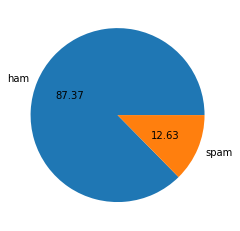

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
#Data is inbalance

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [27]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

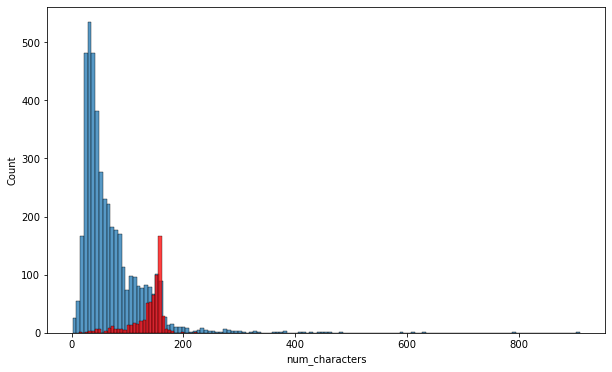

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

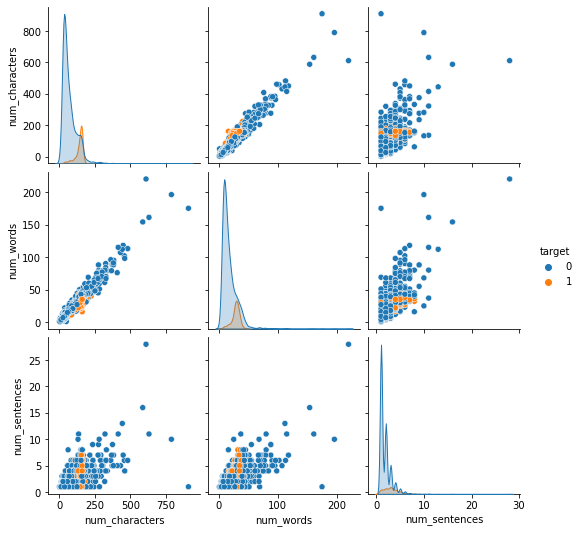

In [29]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

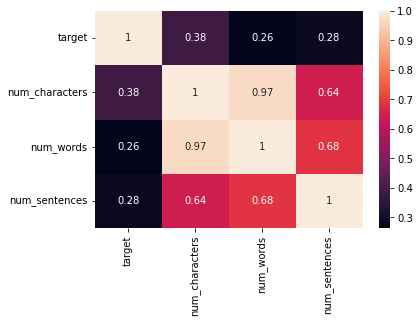

In [30]:
sns.heatmap(df.corr(),annot=True)

# 3) Data Preprocessing

In [ ]:
# Lower case
# Tokenization
# remove special characters
# remove stop words and punctuation
# stemming

In [31]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [33]:
transform_text('I love watching movie on comedy. how about you?') 

'love watch movi comedi'

In [34]:
transform_text('Hello PYTHON')    #lower text

'hello python'

In [35]:
transform_text('Hello Mukesh how ru')    #word_tokenize

'hello mukesh ru'

In [36]:
transform_text('Hello how  r 20 Mukesh?')  #remove punctuation and stopwords

'hello r 20 mukesh'

In [37]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
#stopwords.words('english')

In [39]:
df['transform_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

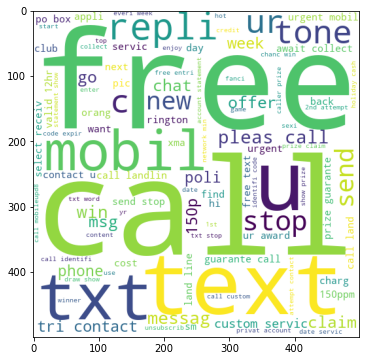

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

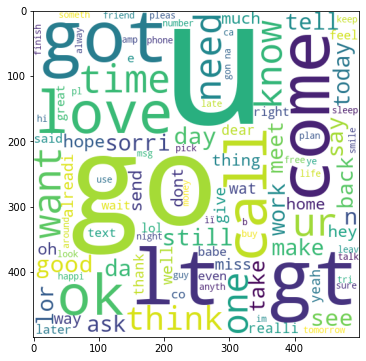

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

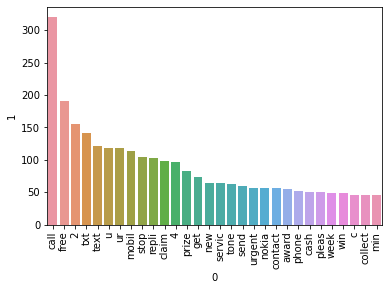

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
           pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35394

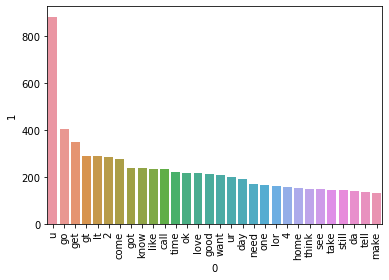

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
           pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4) Model building

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [55]:
x=cv.fit_transform(df['transform_text']).toarray()

In [56]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
x.shape               #5169 sms and 6708 words

(5169, 6708)

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(x_train,y_train)

GaussianNB()

In [63]:
# Eval for Training
y_pred_train= gnb.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3301  319]
 [   0  515]]
******************************
accuracy_score 0.9228536880290206
******************************
precision score 0.617505995203837


In [64]:
# Eval for testing
y_pred_test= gnb.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[792 104]
 [ 20 118]]
******************************
accuracy_score 0.8800773694390716
******************************
precision score 0.5315315315315315


## Create a One Dict and One List

In [65]:
all_acc = {'acc_sc_train':[], 'acc_sc_test':[], 'precision_train':[], 'precision_test':[]}
model_name = []

In [66]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('gnb')

In [67]:
all_acc

{'acc_sc_train': [0.9228536880290206],
 'acc_sc_test': [0.8800773694390716],
 'precision_train': [0.617505995203837],
 'precision_test': [0.5315315315315315]}

In [68]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532


In [69]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [70]:
# Eval for Training
y_pred_train= mnb.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3606   14]
 [  21  494]]
******************************
accuracy_score 0.9915356711003628
******************************
precision score 0.9724409448818898


In [71]:
# Eval for testing
y_pred_test= mnb.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[871  25]
 [ 12 126]]
******************************
accuracy_score 0.9642166344294004
******************************
precision score 0.8344370860927153


In [72]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('mnb')

In [73]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437


In [74]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [75]:
# Eval for Training
y_pred_train= bnb.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3616    4]
 [  93  422]]
******************************
accuracy_score 0.9765417170495768
******************************
precision score 0.9906103286384976


In [76]:
# Eval for testing
y_pred_test= bnb.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[893   3]
 [ 28 110]]
******************************
accuracy_score 0.9700193423597679
******************************
precision score 0.9734513274336283


In [77]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('bnb')

In [78]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451


In [79]:
tfidf= TfidfVectorizer()

In [80]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [81]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
x.shape

(5169, 6708)

In [83]:
y=df['target'].values

In [84]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [86]:
gnb_tf = GaussianNB()
mnb_tf = MultinomialNB()
bnb_tf = BernoulliNB()

In [87]:
gnb_tf.fit(x_train,y_train)

GaussianNB()

In [88]:
# Eval for Training
y_pred_train= gnb_tf.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3301  319]
 [   0  515]]
******************************
accuracy_score 0.9228536880290206
******************************
precision score 0.617505995203837


In [89]:
# Eval for testing
y_pred_test= gnb_tf.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[793 103]
 [ 25 113]]
******************************
accuracy_score 0.8762088974854932
******************************
precision score 0.5231481481481481


In [90]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('gnb_tf')

In [91]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148


In [92]:
mnb_tf.fit(x_train,y_train)

MultinomialNB()

In [93]:
# Eval for Training
y_pred_train= mnb_tf.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3620    0]
 [ 120  395]]
******************************
accuracy_score 0.9709794437726723
******************************
precision score 1.0


In [94]:
# Eval for testing
y_pred_test= mnb_tf.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)                     

confusion matrix :
 [[896   0]
 [ 42  96]]
******************************
accuracy_score 0.9593810444874274
******************************
precision score 1.0


In [95]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('mnb_tf')

In [96]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000


In [97]:
bnb_tf.fit(x_train,y_train)

BernoulliNB()

In [98]:
# Eval for Training
y_pred_train= bnb_tf.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3616    4]
 [  93  422]]
******************************
accuracy_score 0.9765417170495768
******************************
precision score 0.9906103286384976


In [99]:
# Eval for testing
y_pred_test= bnb_tf.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[893   3]
 [ 28 110]]
******************************
accuracy_score 0.9700193423597679
******************************
precision score 0.9734513274336283


In [100]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('bnb_tf')

In [101]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451


In [331]:
#x=cv.fit_transform(df['transform_text']).toarray()

In [332]:
#x

In [333]:
#y=df['target'].values

In [334]:
#y

In [335]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [102]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)     #use tfidf use in fit_transform

KNeighborsClassifier()

In [103]:
# Eval for Training
y_pred_train= KNN.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3620    0]
 [ 334  181]]
******************************
accuracy_score 0.9192261185006046
******************************
precision score 1.0


In [104]:
# Eval for testing
y_pred_test= KNN.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[896   0]
 [103  35]]
******************************
accuracy_score 0.9003868471953579
******************************
precision score 1.0


In [105]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('KNN')

In [106]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000


In [107]:
DT= DecisionTreeClassifier(max_depth=5)  #max_depth=5
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [108]:
# Eval for Training
y_pred_train= DT.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)                          #without hyperparameter accuracy is 1

confusion matrix :
 [[3584   36]
 [ 171  344]]
******************************
accuracy_score 0.9499395405078598
******************************
precision score 0.9052631578947369


In [109]:
# Eval for testing
y_pred_test= DT.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[881  15]
 [ 50  88]]
******************************
accuracy_score 0.937137330754352
******************************
precision score 0.8543689320388349


In [110]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('DT')

In [111]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369


In [112]:
DT_wh= DecisionTreeClassifier()      #DT_wh >>without hyperparameter
DT_wh.fit(x_train, y_train)

DecisionTreeClassifier()

In [113]:
# Eval for Training
y_pred_train= DT_wh.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)                          

confusion matrix :
 [[3620    0]
 [   0  515]]
******************************
accuracy_score 1.0
******************************
precision score 1.0


In [114]:
# Eval for testing
y_pred_test= DT_wh.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[870  26]
 [ 22 116]]
******************************
accuracy_score 0.9535783365570599
******************************
precision score 0.8169014084507042


In [115]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('DT_wh')

In [116]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901


In [117]:
RF = RandomForestClassifier()        
RF.fit(x_train, y_train)             

RandomForestClassifier()

In [118]:
# Eval for Training
y_pred_train= RF.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3620    0]
 [   0  515]]
******************************
accuracy_score 1.0
******************************
precision score 1.0


In [119]:
# Eval for testing
y_pred_test= RF.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)            #best accuracy

confusion matrix :
 [[895   1]
 [ 28 110]]
******************************
accuracy_score 0.971953578336557
******************************
precision score 0.990990990990991


In [120]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('RF')

In [121]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


In [122]:
#hyperparameter   
RF_hyp = RandomForestClassifier(n_estimators=50,random_state=2)        
RF_hyp.fit(x_train, y_train)           

RandomForestClassifier(n_estimators=50, random_state=2)

In [123]:
# Eval for Training
y_pred_train= RF_hyp.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3620    0]
 [   0  515]]
******************************
accuracy_score 1.0
******************************
precision score 1.0


In [124]:
# Eval for testing
y_pred_test= RF_hyp.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)                #best accuracy

confusion matrix :
 [[896   0]
 [ 27 111]]
******************************
accuracy_score 0.9738878143133463
******************************
precision score 1.0


In [125]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('RF_hyp')

In [126]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


In [127]:
AB=AdaBoostClassifier(n_estimators=50,random_state=2)
AB.fit(x_train, y_train)

AdaBoostClassifier(random_state=2)

In [128]:
# Eval for Training
y_pred_train= AB.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3604   16]
 [  85  430]]
******************************
accuracy_score 0.9755743651753326
******************************
precision score 0.9641255605381166


In [129]:
# Eval for testing
y_pred_test= AB.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[890   6]
 [ 34 104]]
******************************
accuracy_score 0.9613152804642167
******************************
precision score 0.9454545454545454


In [130]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('AB')

In [131]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


In [132]:
XG = XGBClassifier()
XG.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
# Eval for Training
y_pred_train= XG.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3620    0]
 [  52  463]]
******************************
accuracy_score 0.9874244256348247
******************************
precision score 1.0


In [134]:
# Eval for testing
y_pred_test= XG.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[888   8]
 [ 20 118]]
******************************
accuracy_score 0.9729206963249516
******************************
precision score 0.9365079365079365


In [135]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('XG')

In [136]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


In [137]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [138]:
# Eval for Training
y_pred_train= svm.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3620    0]
 [  11  504]]
******************************
accuracy_score 0.9973397823458283
******************************
precision score 1.0


In [139]:
# Eval for testing
y_pred_test= svm.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[894   2]
 [ 33 105]]
******************************
accuracy_score 0.9661508704061895
******************************
precision score 0.9813084112149533


In [140]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('svm')

In [141]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


In [142]:
#Hyper parameter
svm_hyp = SVC(kernel='sigmoid', gamma=1.0)
svm_hyp.fit(x_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [143]:
# Eval for Training
y_pred_train= svm_hyp.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3613    7]
 [  51  464]]
******************************
accuracy_score 0.9859733978234583
******************************
precision score 0.9851380042462845


In [144]:
# Eval for testing
y_pred_test= svm_hyp.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[893   3]
 [ 25 113]]
******************************
accuracy_score 0.9729206963249516
******************************
precision score 0.9741379310344828


In [145]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('svm_hyp')

In [146]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


In [147]:
LR=LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [148]:
# Eval for Training
y_pred_train= LR.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_train=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_sc_train)
print('*'*30)

precision_train=precision_score(y_train,y_pred_train)
print('precision score',precision_train)

confusion matrix :
 [[3614    6]
 [ 157  358]]
******************************
accuracy_score 0.9605804111245465
******************************
precision score 0.9835164835164835


In [149]:
# Eval for testing
y_pred_test= LR.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix :\n',cnf)
print('*'*30)

acc_sc_test=accuracy_score(y_test,y_pred_test)
print('accuracy_score',acc_sc_test)
print('*'*30)

precision_test=precision_score(y_test,y_pred_test)
print('precision score',precision_test)

confusion matrix :
 [[895   1]
 [ 54  84]]
******************************
accuracy_score 0.9468085106382979
******************************
precision score 0.9882352941176471


In [150]:
all_acc['acc_sc_train'].append(acc_sc_train)
all_acc['acc_sc_test'].append(acc_sc_test)
all_acc['precision_train'].append(precision_train)
all_acc['precision_test'].append(precision_test)
model_name.append('LR')

In [151]:
acc_df = pd.DataFrame(all_acc, index=model_name)
acc_df

,acc_sc_train,acc_sc_test,precision_train,precision_test
gnb,0.922854,0.880077,0.617506,0.531532
mnb,0.991536,0.964217,0.972441,0.834437
bnb,0.976542,0.970019,0.990610,0.973451
gnb_tf,0.922854,0.876209,0.617506,0.523148
mnb_tf,0.970979,0.959381,1.000000,1.000000
bnb_tf,0.976542,0.970019,0.990610,0.973451
KNN,0.919226,0.900387,1.000000,1.000000
DT,0.949940,0.937137,0.905263,0.854369
DT_wh,1.000000,0.953578,1.000000,0.816901
RF,1.000000,0.971954,1.000000,0.990991


# RESULT SUMMARY

# Create Pickle File for API

In [153]:
import pickle as pkl
import json

In [155]:
with open('RF_hyp.pkl', 'wb') as f:
    pkl.dump(RF_hyp, f)